# データサイエンス 第4回

In [3]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install geopandas matplotlib numpy pandas pyserial requests japanize-matplotlib scikit-learn setuptools 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
%matplotlib inline 
import random
import math
from scipy import stats

### 確率を扱うプログラミング

In [3]:
x = np.random.rand()
print(x)

x = np.random.rand(10)
print(x)

0.7323592688767672
[0.0013226  0.38468114 0.6500408  0.94987104 0.19726113 0.03004571
 0.85657323 0.59134263 0.57017209 0.71019131]


In [4]:
x1 = np.random.randint(10)
print(x1)

x2 = np.random.randint(low=-10, high=10, size=5)
print(x2)

2
[-2  3 -1  1  7]


In [5]:
# シードを設定
random.seed(42)

# ランダムな値を生成
print(random.random())  # 例: 0.6394267984578837
print(random.randint(1, 10))  # 例: 1

# 再度同じシードを設定
random.seed(42)

# 同じランダムな値が生成される
print(random.random())  # 例: 0.6394267984578837
print(random.randint(1, 10))  # 例: 1

0.6394267984578837
1
0.6394267984578837
1


### <span style="color: #F08000;">例題　確率を扱うプログラミングの練習</span>

$1$ から $6$ の目が出るサイコロを出た目を表示するプログラムをつくれ
さらに，サイコロを $600$ 回振ったときに，それぞれの目が出た回数を棒グラフにまとめよ

サイコロを1回振って出た目: 1


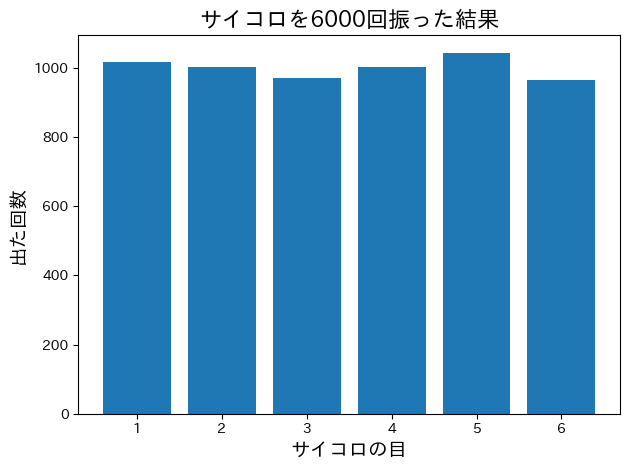

In [6]:
# サイコロを1回振って出た目を表示
dice_roll = np.random.randint(1, 7)
print(f"サイコロを1回振って出た目: {dice_roll}")

# サイコロを6000回振った結果を記録
rolls = np.random.randint(1, 7, size=6000)

# 結果をカウント
counts = {i: 0 for i in range(1, 7)}
for r in rolls:
    counts[r] += 1

labels, values = zip(*sorted(counts.items()))

plt.figure()
plt.bar(labels, values)
plt.xlabel('サイコロの目', fontsize=14)
plt.ylabel('出た回数', fontsize=14)
plt.title('サイコロを6000回振った結果', fontsize=16)
plt.tight_layout()
plt.show()

### <span style="color: #F08000;">問題1　確率を扱うプログラミングの練習</span>

以下の確率で運勢を占うプログラムを作れ

さらに，占いを 1000 回行った時にそれぞれが発生した頻度を棒グラフにまとめよ

<style scoped>table{font-size:auto; margin-left: auto; margin-right: auto;}</style>

| 確率 | 20% | 70% | 10% | 
|-|-|-|-|
| メッセージ | Very Lucky | Lucky | Not Lucky | 


In [ ]:
##############################
# 問題1のコードを記入

##############################

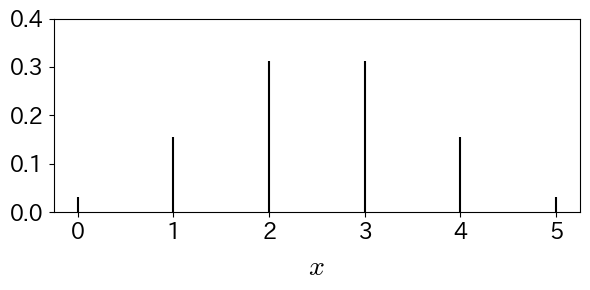

In [7]:
# サイコロの面とそれぞれの面が出る確率
def binomial_probability(n, x, p):
    # nCx を計算 (n! / (x! * (n-x)!))
    combination = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))
    # 二項分布の確率 P(X=x)
    probability = combination * (p ** x) * ((1 - p) ** (n - x))
    return probability

# 5回の試行 (n=5) で，各 x (成功数) に対する確率を計算
n = 5
p = 0.5
x_values = np.arange(0, n + 1)
probabilities = [binomial_probability(n, x, p) for x in x_values]

plt.figure(figsize=(6, 3))
plt.stem(x_values, probabilities, linefmt='black', markerfmt='', basefmt=' ')
plt.ylim(0, 0.4)
plt.xlabel("$x$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

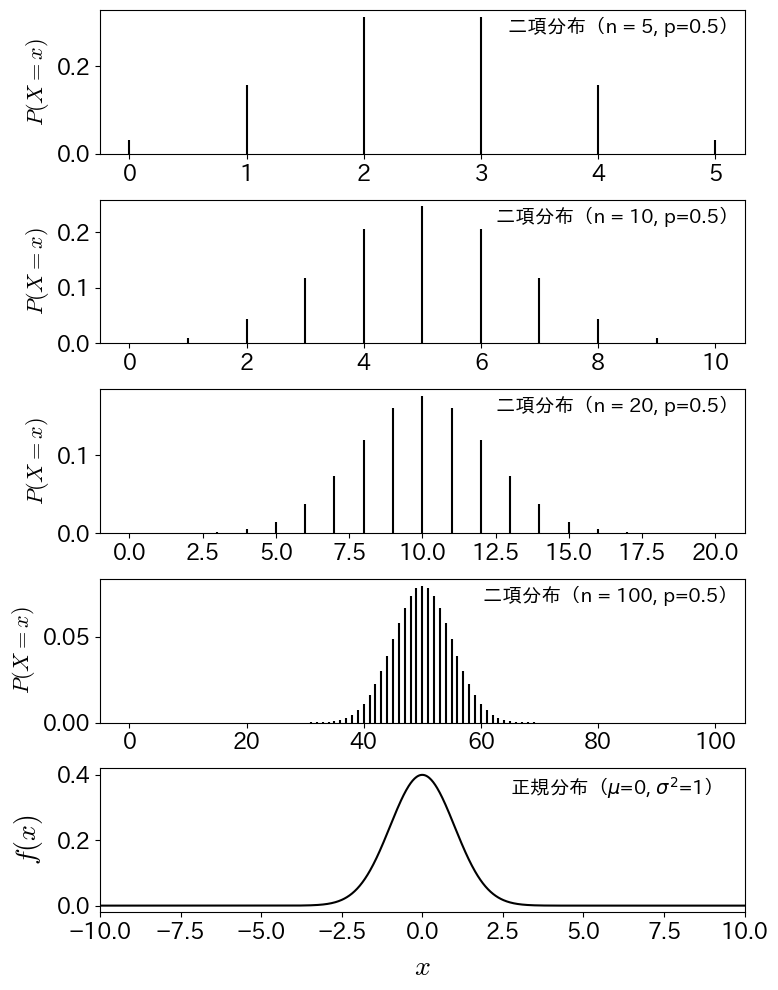

In [8]:
# 二項分布の確率
def binomial_probability(n, x, p):
    combination = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))
    return combination * (p ** x) * ((1 - p) ** (n - x))

ns = [5, 10, 20, 100]
p = 0.5

plt.figure(figsize=(8, 10))

# 上段4つ：二項分布のPMF
for i, n in enumerate(ns, start=1):
    x_values = np.arange(0, n + 1)
    probabilities = [binomial_probability(n, x, p) for x in x_values]

    plt.subplot(5, 1, i)
    plt.stem(x_values, probabilities, linefmt='black', markerfmt='', basefmt=' ')
    plt.ylim(bottom=0)
    plt.tick_params(labelsize=16)
    plt.ylabel("$P(X=x)$", fontsize=16, math_fontfamily='cm')
    plt.text(0.99, 0.95, f"二項分布（n = {n}, p={p}）",
             transform=plt.gca().transAxes, fontsize=14,
             va='top', ha='right')

plt.subplot(5, 1, 5)
x = np.linspace(-10, 10, 1001)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2) 
plt.plot(x, y, color='black', ls='-')
plt.xlim(-10, 10)
plt.xlabel("$x$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.ylabel("$f(x)$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.text(0.95, 0.95, "正規分布（$\\mu$=0, $\\sigma^2$=1）",
         transform=plt.gca().transAxes, fontsize=14,
         va='top', ha='right')
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

### <span style="color: #F08000;">問題2-1　正規分布の確率密度関数</span>

以下の式で表されるグラフを$-4 \leq x \leq 4$ の範囲で描画するプログラムをつくれ．
ただし $\mu=0$，$\sigma^2=1$ とする

$$
  f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(−\frac{(x−\mu)^2}{2\sigma^2 }\right)
$$


In [9]:
##############################
# 問題2-1のコードを記入

##############################

### <span style="color: #F08000;">問題2-2　正規分布の確率密度関数</span>

表がでる確率が $p=0.5$ のコインを $100$ 回投げる実験を $n=10000$ 回行う．
表が出た回数を棒グラフにまとめ，$\mu=np\quad \sigma^2=np(1-p)$ の正規分布と重ねて比較せよ．

In [10]:
##############################
# 問題2-2のコードを記入

##############################

### さまざまな正規分布
平均 $\mu$ の値を変化させる

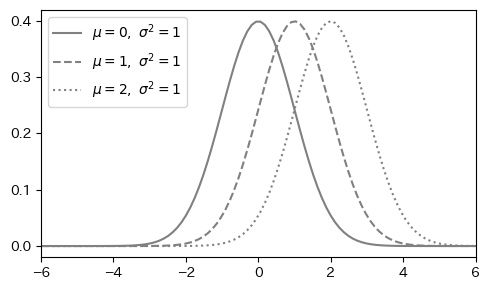

In [11]:
xs = np.linspace(-6, 6, 100)
params = [(0, 1), (1, 1), (2, 1)]
linestyles = ['-', '--', ':']

def normal_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.figure(figsize=(5, 3))
for (m, s), ls in zip(params, linestyles):
    y = normal_pdf(xs, m, s)
    plt.plot(xs, y, ls=ls, color='gray',
             label=rf'$\mu={m},\ \sigma^2={s**2}$')

plt.xlim(-6, 6)
plt.legend()
plt.tight_layout()
plt.show()

### さまざまな正規分布
分散 $\sigma^2$ の値を変化させる

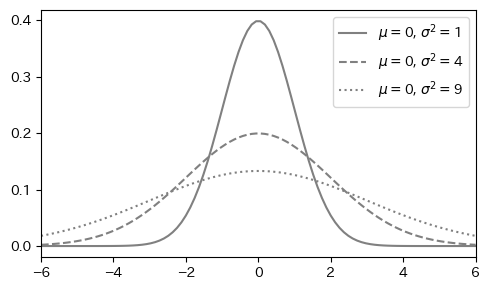

In [12]:
xs = np.linspace(-6, 6, 100)
params = [(0, 1), (0, 2), (0, 3)]
linestyles = ['-', '--', ':']

plt.figure(figsize=(5, 3))
for para, ls in zip(params, linestyles):
    m, s = para
    rv = stats.norm(m, s)
    plt.plot(xs, rv.pdf(xs), label=r'$\mu=$'+f'{m}, '+r'$\sigma^2=$'+f'{s**2}', ls=ls, color='gray')

plt.xlim(-6, 6)
plt.legend()
plt.tight_layout()
plt.show()

### 標準正規分布表

In [13]:
# Z値の範囲を設定（-3.0から3.0まで0.1刻み）
z_values = np.arange(-3.0, 3.1, 0.1)

# Z値に対応する累積分布関数（CDF）の値を計算
cdf_values = stats.norm.cdf(z_values)

# Z値とCDF値をデータフレームにまとめる
df = pd.DataFrame({'z': z_values, '下側確率': cdf_values})

df

,z,下側確率
0,-3.0,0.001350
1,-2.9,0.001866
2,-2.8,0.002555
3,-2.7,0.003467
4,-2.6,0.004661
...,...,...
56,2.6,0.995339
57,2.7,0.996533
58,2.8,0.997445
59,2.9,0.998134


### 正規分布における確率の算出

範囲 [-2, -1] の面積: 0.1359


<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_4632/1158954510.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.title('正規分布の確率密度関数 ($\mu=0, \sigma^2=1$)')


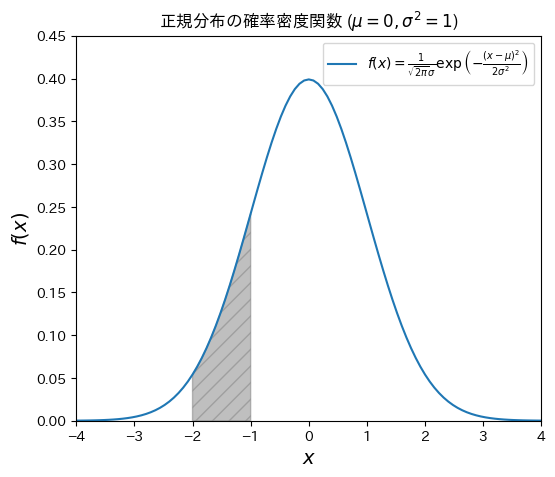

In [14]:
mu = 0 # 平均
sigma = 1 # 標準偏差
a = -2
b = -1

# 正規分布 を定義
def f(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = np.linspace(-4, 4, 101)
y = f(x, mu, sigma)

# 範囲 [a, b] の面積を計算
area = stats.norm.cdf(b, loc=mu, scale=sigma) - stats.norm.cdf(a, loc=mu, scale=sigma)
print("範囲 [{}, {}] の面積: {:.4f}".format(a, b, area))

plt.figure(figsize=(6, 5))
plt.plot(x, y, label=r'$f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$')
x_fill = np.linspace(a, b, 100)
y_fill = f(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5, hatch='//')
plt.title('正規分布の確率密度関数 ($\mu=0, \sigma^2=1$)')
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.xlim(-4, 4)
plt.ylim(0, 0.45)
plt.legend(loc='upper right')
plt.show()

### <span style="color: #F08000;">問題3</span>

標準正規分布 $N(0,1^2)$ に従う母集団から無作為に観測値 $z$ を取り出したとする
このとき $z$ が $1.52$ 以上の値となる確率を求めなさい

In [ ]:
##############################
# 問題3のコードを記入

##############################

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_5098/3880342454.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'正規分布の確率密度関数 ($\mu={mu}, \sigma={sigma}$)')
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_5098/3880342454.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'正規分布の確率密度関数 ($\mu={mu}, \sigma={sigma}$)')


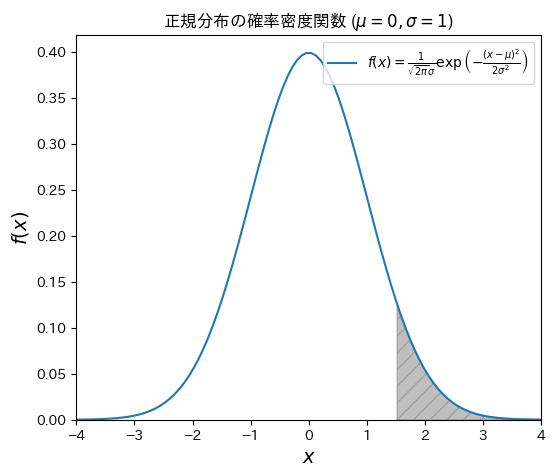

In [7]:
mu = 0  # 平均
sigma = 1  # 標準偏差
x_value = 1.52  # 計算するxの値

# x の範囲を定義
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(6, 5))
plt.plot(x, y, label=r'$f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$')

# x >= 60 の部分を塗りつぶし
x_fill = np.linspace(x_value, mu + 4*sigma, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5, hatch='//')
plt.title(f'正規分布の確率密度関数 ($\mu={mu}, \sigma={sigma}$)')
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.ylim(0)
plt.legend(loc='upper right')
plt.show()

### <span style="color: #F08000;">問題4</span>

母平均が $\mu=50$ ，母標準偏差が $\sigma=10$ の正規分布 $N(50,10^2)$ に従う母集団があるとする
この母集団から観測値 $x$ を無作為に取り出すとき，$x$ が $60$ 以上となる確率を求めよ

In [ ]:
##############################
# 問題4のコードを記入

##############################

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_5098/425107536.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.title('正規分布の確率密度関数 ($\mu=50, \sigma=10$)')


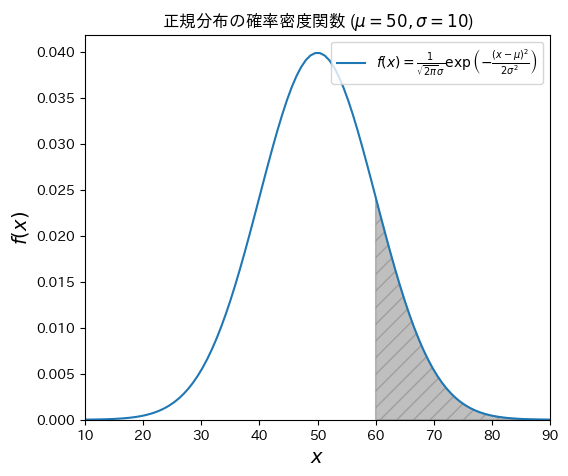

In [8]:
mu = 50  # 平均
sigma = 10  # 標準偏差
x_value = 60  # 計算するxの値

# x の範囲を定義
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# グラフの描画
plt.figure(figsize=(6, 5))
plt.plot(x, y, label=r'$f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$')

# x >= 60 の部分を塗りつぶし
x_fill = np.linspace(x_value, mu + 4*sigma, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='gray', alpha=0.5, hatch='//')
plt.title('正規分布の確率密度関数 ($\mu=50, \sigma=10$)')
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.ylim(0)
plt.legend(loc='upper right')
plt.show()

### 標本平均 $\bar{x}$ が従う確率分布

母集団 $N(\mu, \sigma^2)$ から 1個の $x$ を取り出して記録する試行を10000回繰り返し，ヒストグラムにまとめる　

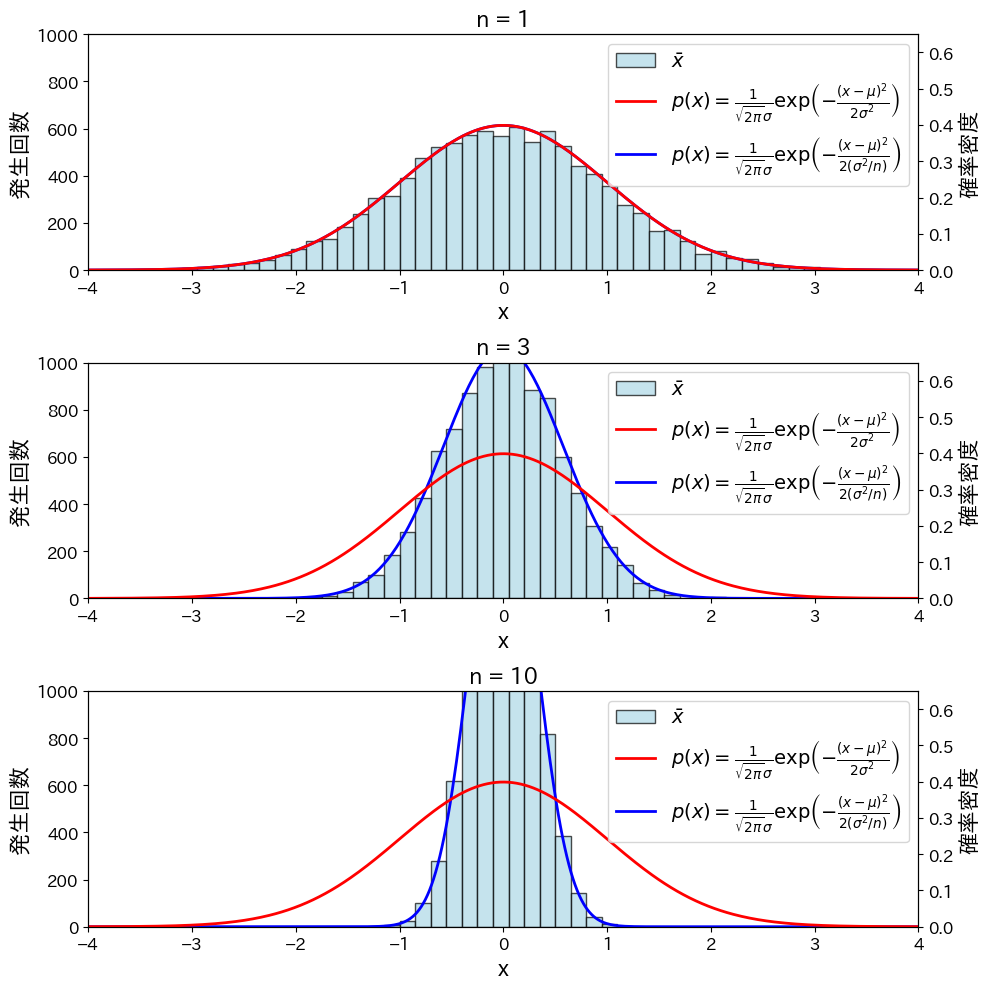

In [9]:
mu = 0
sigma = 1
num_trials = 10000

def normal_pdf(x, m, s):
    return (1 / (np.sqrt(2 * np.pi) * s)) * np.exp(-0.5 * ((x - m) / s) ** 2)

def plot_histogram_with_combined_legend_pyplot(n):
    samples_means = [np.mean(np.random.normal(mu, sigma, n)) for _ in range(num_trials)]

    # ヒストグラム（左軸）
    hist = plt.hist(samples_means,
                    bins=np.arange(-4, 4 + 0.15, 0.15),
                    color='lightblue', edgecolor='black', alpha=0.7, label=r'$\bar{x}$')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('発生回数', fontsize=16)
    plt.xlim(-4, 4)
    plt.ylim(0, 1000)
    plt.tick_params(labelsize=12)
    ax1 = plt.gca()

    # 右軸：確率密度
    ax2 = ax1.twinx()
    x_values = np.linspace(-4, 4, 400)
    y_values  = normal_pdf(x_values, mu, sigma)               # 母集団
    y_values2 = normal_pdf(x_values, mu, sigma / np.sqrt(n))  # 標本平均
    line_mean, = ax2.plot(x_values, y_values2, color='blue', linewidth=2,
                          label=r'$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\!\left(-\frac{(x-\mu)^2}{2(\sigma^2/n)}\right)$')
    line_pop,  = ax2.plot(x_values, y_values,  color='red',  linewidth=2,
                          label=r'$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$')
    ax2.set_ylabel('確率密度', fontsize=16)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(0, 0.65)
    ax2.tick_params(labelsize=12)
    ax2.legend(handles=[hist[2][0], line_pop, line_mean], loc='upper right', fontsize=14)
    ax2.set_title(f'n = {n}', fontsize=16)

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, n in enumerate([1, 3, 10], start=1):
    plt.subplot(3, 1, i)
    plot_histogram_with_combined_legend_pyplot(n)

plt.tight_layout()
plt.show()

### <span style="color: #F08000;">問題5</span>

母集団が母平均が $\mu=171$ ，母標準偏差が $\sigma=5.9$ の正規分布 $N(171, 5.9^2)$ に従うとする
この母集団から無作為に観測値を $6$ つ $(x_1, x_2, x_3, x_4, x_5, x_6)$ を取り出したとする
この標本平均 $\bar{x}$ が $175$ 以上となる確率を以下の設問に従って計算せよ

問1　この標本平均 $\bar{x}$ が従う正規分布の期待値（平均）$\mu_{\bar{x}}$ と標準偏差 $\sigma_{\bar{x}}$ を求めよ

問2　この標本平均 $\bar{x}$ が $175$ 以上となる確率を計算せよ

In [12]:
##############################
# 問題5のコードを記入
z=(175-171)/5.9
print(z)
##############################

0.6779661016949152


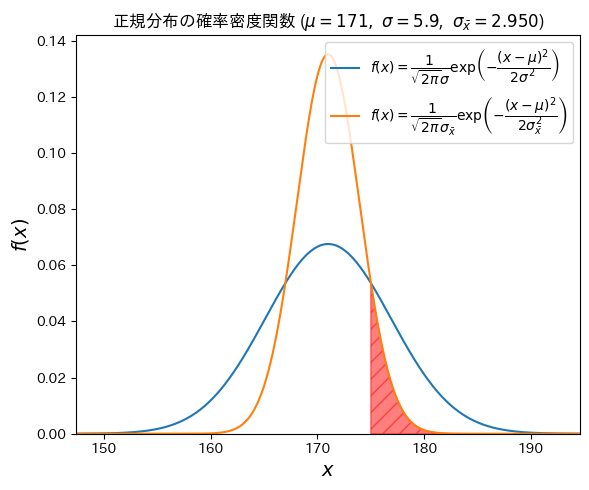

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
mu = 171      # 平均
sigma = 5.9   # 標準偏差
x_value = 175 # 塗りつぶし開始の x
n = 4         # 標本サイズ
sigma_xbar = sigma / np.sqrt(n)  # 標本平均の標準誤差

def normal_pdf(x, m, s):
    return (1 / (np.sqrt(2*np.pi) * s)) * np.exp(-((x - m) ** 2) / (2 * s**2))

# x と密度
x  = np.linspace(mu - 4*sigma, mu + 4*sigma, 600)
y  = normal_pdf(x, mu, sigma)
y2 = normal_pdf(x, mu, sigma_xbar)

plt.figure(figsize=(6, 5))
plt.plot(x, y, label=r'$f(x)=\dfrac{1}{\sqrt{2\pi}\sigma}\exp\!\left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)$')
plt.plot(x, y2, label=r'$f(x)=\dfrac{1}{\sqrt{2\pi}\sigma_{\bar{x}}}\exp\!\left(-\dfrac{(x-\mu)^2}{2\sigma_{\bar{x}}^{2}}\right)$')

# 右側尾部（x >= x_value）を標本平均の分布で塗りつぶし
x_fill = np.linspace(x_value, x.max(), 300)
y_fill = normal_pdf(x_fill, mu, sigma_xbar)
plt.fill_between(x_fill, y_fill, 0, color='red', alpha=0.5, hatch='//')
plt.title(f'正規分布の確率密度関数 ($\\mu={mu},\\ \\sigma={sigma}$,  $\\sigma_\\bar{{x}}={sigma_xbar:.3f}$)')
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.xlim(mu - 4*sigma, mu + 4*sigma)
plt.ylim(bottom=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### <span style="color: #F08000;">問題6</span>

母集団が $2$ つある
母集団 $A$ は母平均が $\mu_A=171$ で母標準偏差が $\sigma_A=5.9$ の正規分布 $N(171,5.9^2)$ に従う
母集団 $B$ は母平均が $\mu_B=158$ で母標準偏差が $\sigma_B=5.4$ の正規分布 $N(158,5.4^2)$ に従う
この $2$ つの母集団からそれぞれ $1$ つずつ観測値 $x_A$ と $x_B$ を無作為に取り出す
このときこの $2$ つの差 $x_A-x_B$ が $15$ 以上 となる確率を求めよ

In [ ]:
##############################
# 問題6のコードを記入

##############################

### <span style="color: #F08000;">問題7</span>

母集団が２つある．
母集団 $A$ は母平均が $\mu_A=171$ で母標準偏差が $\sigma_A=5.9$ の正規分布 $N(171,5.9^2)$ に従う
母集団 $B$ は母平均が $\mu_B=158$ で母標準偏差が $\sigma_B=5.4$ の正規分布 $N(158,5.4^2)$ に従う

母集団 $A$ から無作為に $3$ つの観測値 $x_{A1}, x_{A2}, x_{A3}$ を得る
そして標本平均を計算する
$$
\bar{x}_A = \frac{x_{A1} +x_{A2} + x_{A3}}{3}
$$
次いで，母集団 $B$ から無作為に $4$ つの観測値 $x_{B1}, x_{B2}, x_{B3}, x_{B4}$ を得る
そして標本平均を計算する
$$
\bar{x}_B = \frac{x_{B1} +x_{B2} + x_{B3}+ x_{B4}}{4}
$$
このとき，$2$ つの標本平均の差 $\bar{x}_A - \bar{x}_B$ が $15$ 以上となる確率を求めよ

In [ ]:
##############################
# 問題7のコードを記入

##############################